In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

In [3]:
path = "../input/diabetic-retinopathy-resized/resized_train/resized_train"

In [4]:
data = "../input/diabetic-retinopathy-resized/resized_train/resized_train"
print('number of images in total - ',len(os.listdir(data)))

number of images in total -  35126


In [5]:
index = pd.read_csv("../input/diabetic-retinopathy-resized/trainLabels.csv") 
print('number of images in total - ',len(index))

number of images in total -  35126


In [6]:
index.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [7]:
#format correctly
index['image_name'] = [i+".jpeg" for i in index['image'].values]
index['level_binary'] = [i for i in index['level'].values]

# for i in range(len(index.level)):
#     if index['level'][i] == 0:
#         index['level_binary'][i] = 0
#     else:
#         index['level_binary'][i] = 1
    
index.head(10)

,image,level,image_name,level_binary
0,10_left,0,10_left.jpeg,0
1,10_right,0,10_right.jpeg,0
2,13_left,0,13_left.jpeg,0
3,13_right,0,13_right.jpeg,0
4,15_left,1,15_left.jpeg,1
5,15_right,2,15_right.jpeg,2
6,16_left,4,16_left.jpeg,4
7,16_right,4,16_right.jpeg,4
8,17_left,0,17_left.jpeg,0
9,17_right,1,17_right.jpeg,1


In [8]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image         35126 non-null  object
 1   level         35126 non-null  int64 
 2   image_name    35126 non-null  object
 3   level_binary  35126 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


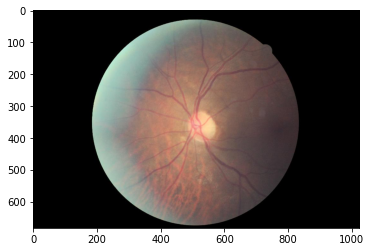

In [9]:
temp = path + '/10_left' + '.jpeg'

plt.imshow(plt.imread(temp))

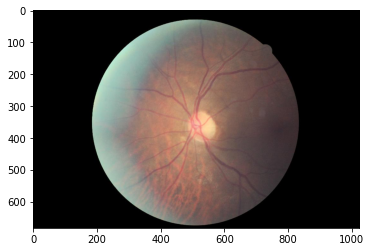

In [10]:
temp = path + '/10_left' + '.jpeg'

plt.imshow(plt.imread(temp))

In [11]:
plt.imread(temp).shape

(683, 1024, 3)

In [12]:
train, val = train_test_split(index, test_size=0.2,random_state=42,stratify=index["level"])


In [13]:
train.shape, val.shape

((28100, 4), (7026, 4))

In [14]:
train_datagen = ImageDataGenerator(rescale            = 1/255,
                                   shear_range        = 0.2,
                                   zoom_range         = 0.2,
                                   horizontal_flip    = True,
                                   rotation_range     = 40,
                                   width_shift_range  = 0.2,
                                   height_shift_range = 0.2)

val_datagen = ImageDataGenerator(rescale = 1/255)

In [15]:
train_set = train_datagen.flow_from_dataframe(
    train,
    "../input/diabetic-retinopathy-resized/resized_train/resized_train",
    x_col="image_name",
    y_col="level",
    class_mode="raw",
    color_mode="rgb",
    batch_size=32,
    target_size=(64, 64))

val_set = val_datagen.flow_from_dataframe(
    val,
    "../input/diabetic-retinopathy-resized/resized_train/resized_train",
    x_col="image_name",
    y_col="level",
    class_mode="raw",
   color_mode="rgb",
    batch_size=32,
    target_size=(64, 64))

Found 28100 validated image filenames.
Found 7026 validated image filenames.


In [16]:
model = Sequential()

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [19]:
model_train = model.fit(
    train_set,
    #steps_per_epoch = 200,
    epochs = 5,
    validation_data = val_set,
    verbose=1
   # validation_steps = 100
)

Epoch 1/5
879/879 [==============================] - 825s 937ms/step - loss: 0.9178 - accuracy: 0.7292 - val_loss: 0.8666 - val_accuracy: 0.7347
Epoch 2/5
879/879 [==============================] - 609s 692ms/step - loss: 0.8891 - accuracy: 0.7316 - val_loss: 0.8851 - val_accuracy: 0.7347
Epoch 3/5
879/879 [==============================] - 623s 709ms/step - loss: 0.8760 - accuracy: 0.7363 - val_loss: 0.8930 - val_accuracy: 0.7347
Epoch 4/5
879/879 [==============================] - 609s 692ms/step - loss: 0.8858 - accuracy: 0.7324 - val_loss: 0.8796 - val_accuracy: 0.7347
Epoch 5/5
879/879 [==============================] - 626s 713ms/step - loss: 0.8774 - accuracy: 0.7330 - val_loss: 0.8784 - val_accuracy: 0.7347


# Data Visualization

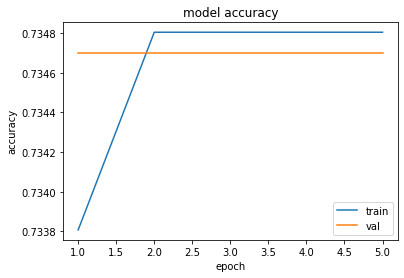

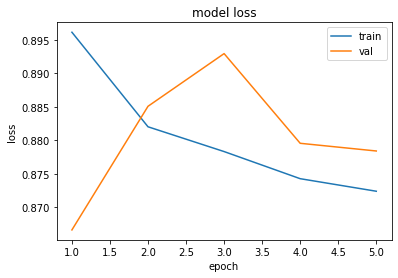

In [23]:
epochs=range(1,len(model_train.history['val_loss'])+1)

plt.title('model accuracy')
plt.plot(epochs,model_train.history['accuracy'])
plt.plot(epochs,model_train.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.plot(epochs,model_train.history['loss'])
plt.plot(epochs,model_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()